In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [9]:
# Đọc dữ liệu
df_HN = pd.read_csv('AQI_HaNoi_Updated.csv')
df_DN = pd.read_csv('AQI_DaNang_Updated.csv')
df_VT = pd.read_csv('AQI_VietTri_Updated.csv')

In [10]:
# Chia dữ liệu train, test theo tỉ lệ 9:1

# Hà Nội
train_size_HN = int(0.9 * len(df_HN))
test_size_HN = len(df_HN) - train_size_HN

train_data_HN = df_HN[:train_size_HN]
test_data_HN = df_HN[train_size_HN:train_size_HN+test_size_HN]

# Đà Nẵng
train_size_DN = int(0.9 * len(df_DN))
test_size_DN = len(df_DN) - train_size_DN

train_data_DN = df_DN[:train_size_DN]
test_data_DN = df_DN[train_size_DN:train_size_DN+test_size_DN]

#Việt Trì
train_size_VT = int(0.9 * len(df_VT))
test_size_VT = len(df_VT) - train_size_VT

train_data_VT = df_VT[:train_size_VT]
test_data_VT = df_VT[train_size_VT:train_size_VT+test_size_VT]

In [11]:
# Train model
model_HN = SimpleExpSmoothing(train_data_HN['AQI']).fit(optimized=True)
model_DN = SimpleExpSmoothing(train_data_DN['AQI']).fit(optimized=True)
model_VT = SimpleExpSmoothing(train_data_VT['AQI']).fit(optimized=True)

In [12]:
# Dự đoán trên tập test và dự đoán 30 ngày tiếp theo

# Hà Nội
test_pred_HN = model_HN.forecast(len(test_data_HN['AQI']))
last_index_HN = df_HN.index[-1]
last_data_HN_30 = pd.RangeIndex(start=last_index_HN, stop=last_index_HN+30, step=1)
last_data_HN_60 = pd.RangeIndex(start=last_index_HN, stop=last_index_HN+60, step=1)
last_data_HN_90 = pd.RangeIndex(start=last_index_HN, stop=last_index_HN+90, step=1)
pred_30days_HN = model_HN.forecast(len(last_data_HN_30))
pred_60days_HN = model_HN.forecast(len(last_data_HN_60))
pred_90days_HN = model_HN.forecast(len(last_data_HN_90))

# Đà Nẵng
test_pred_DN = model_DN.forecast(len(test_data_DN['AQI']))
last_index_DN = df_DN.index[-1]
last_data_DN_30 = pd.RangeIndex(start=last_index_DN, stop=last_index_DN+30, step=1)
last_data_DN_60 = pd.RangeIndex(start=last_index_DN, stop=last_index_DN+60, step=1)
last_data_DN_90 = pd.RangeIndex(start=last_index_DN, stop=last_index_DN+90, step=1)
pred_30days_DN = model_DN.forecast(len(last_data_DN_30))
pred_60days_DN = model_DN.forecast(len(last_data_DN_60))
pred_90days_DN = model_DN.forecast(len(last_data_DN_90))

#Việt Trì
test_pred_VT = model_VT.forecast(len(test_data_VT['AQI']))
last_index_VT = df_VT.index[-1]
last_data_VT_30 = pd.RangeIndex(start=last_index_VT, stop=last_index_VT+30, step=1)
last_data_VT_60 = pd.RangeIndex(start=last_index_VT, stop=last_index_VT+60, step=1)
last_data_VT_90 = pd.RangeIndex(start=last_index_VT, stop=last_index_VT+90, step=1)
pred_30days_VT = model_VT.forecast(len(last_data_VT_30))
pred_60days_VT = model_VT.forecast(len(last_data_VT_60))
pred_90days_VT = model_VT.forecast(len(last_data_VT_90))

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Hà Nội
mape_HN = np.mean(np.abs((test_data_HN['AQI'] - test_pred_HN) / test_data_HN['AQI'])) * 100
mae_HN = mean_absolute_error(test_data_HN['AQI'], test_pred_HN)
rmse_HN = np.sqrt(mean_squared_error(test_data_HN['AQI'], test_pred_HN))

print(f'Hà Nội MAPE: {mape_HN:.2f}%')
print(f'Hà Nội MAE: {mae_HN:.2f}')
print(f'Hà Nội RMSE: {rmse_HN:.2f}')

# Đà Nẵng
mape_DN = np.mean(np.abs((test_data_DN['AQI'] - test_pred_DN) / test_data_DN['AQI'])) * 100
mae_DN = mean_absolute_error(test_data_DN['AQI'], test_pred_DN)
rmse_DN = np.sqrt(mean_squared_error(test_data_DN['AQI'], test_pred_DN))

print(f'Đà Nẵng MAPE: {mape_DN:.2f}%')
print(f'Đà Nẵng MAE: {mae_DN:.2f}')
print(f'Đà Nẵng RMSE: {rmse_DN:.2f}')

#Việt Trì
mape_VT = np.mean(np.abs((test_data_VT['AQI'] - test_pred_VT) / test_data_VT['AQI'])) * 100
mae_VT = mean_absolute_error(test_data_VT['AQI'], test_pred_VT)
rmse_VT = np.sqrt(mean_squared_error(test_data_VT['AQI'], test_pred_VT))

print(f'Việt Trì MAPE: {mape_VT:.2f}%')
print(f'Việt Trì MAE: {mae_VT:.2f}')
print(f'Việt Trì RMSE: {rmse_VT:.2f}')

Hà Nội MAPE: 24.85%
Hà Nội MAE: 37.41
Hà Nội RMSE: 45.43
Đà Nẵng MAPE: 70.00%
Đà Nẵng MAE: 34.06
Đà Nẵng RMSE: 44.00
Việt Trì MAPE: 42.59%
Việt Trì MAE: 40.11
Việt Trì RMSE: 48.50


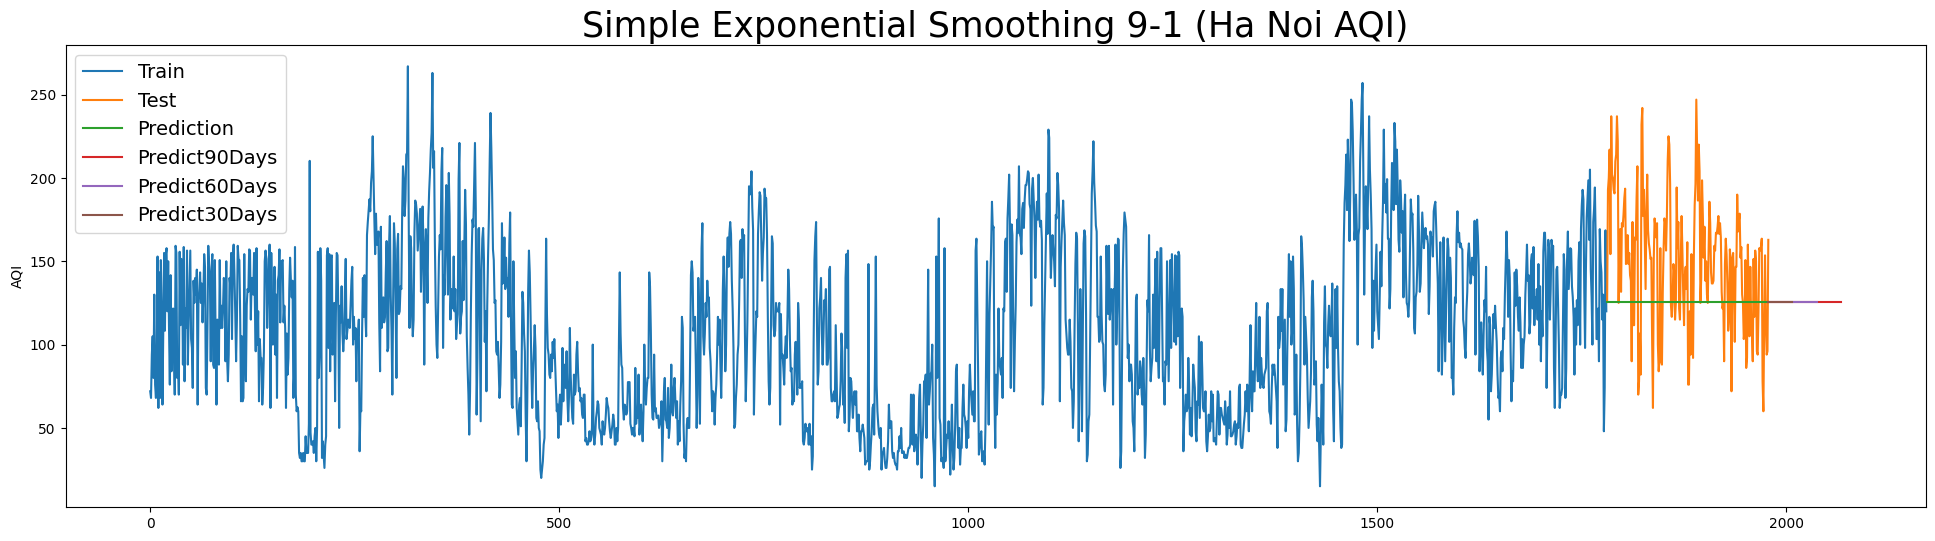

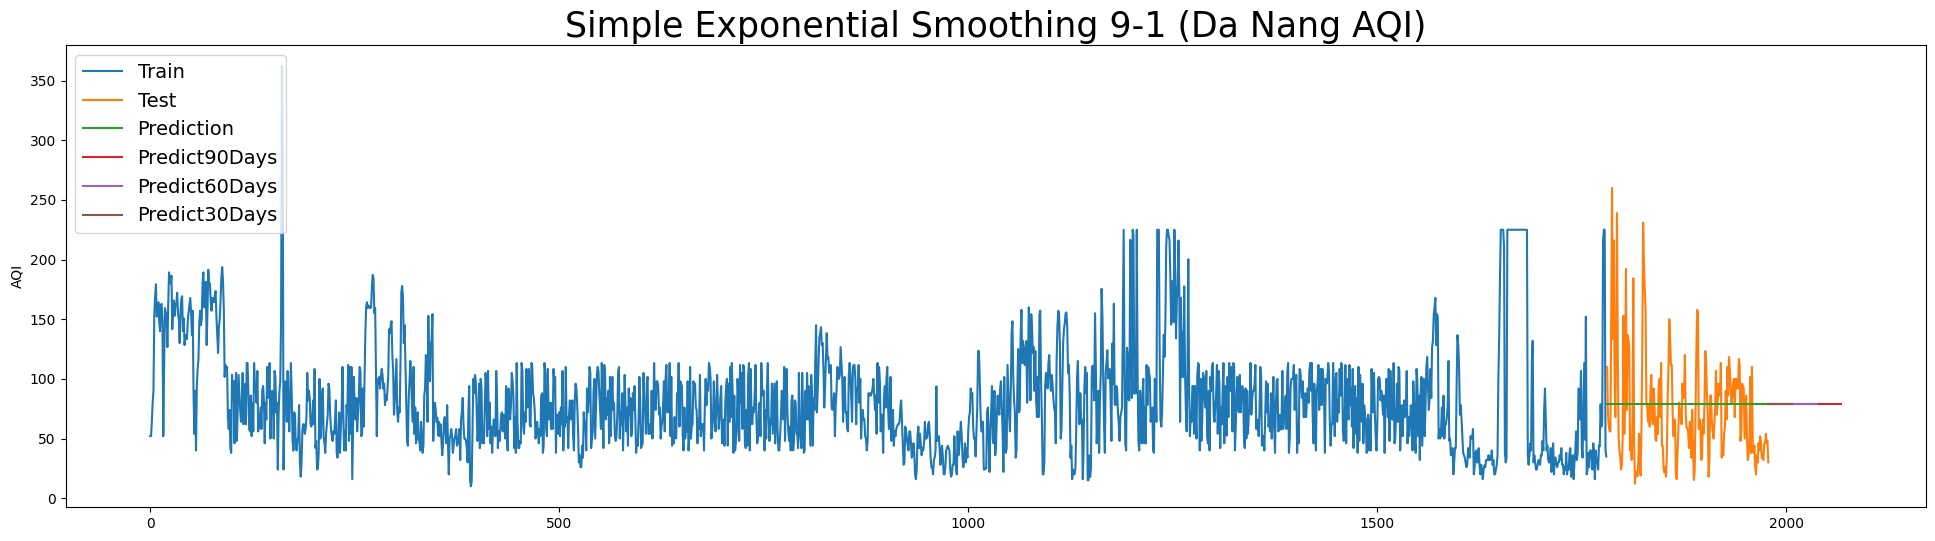

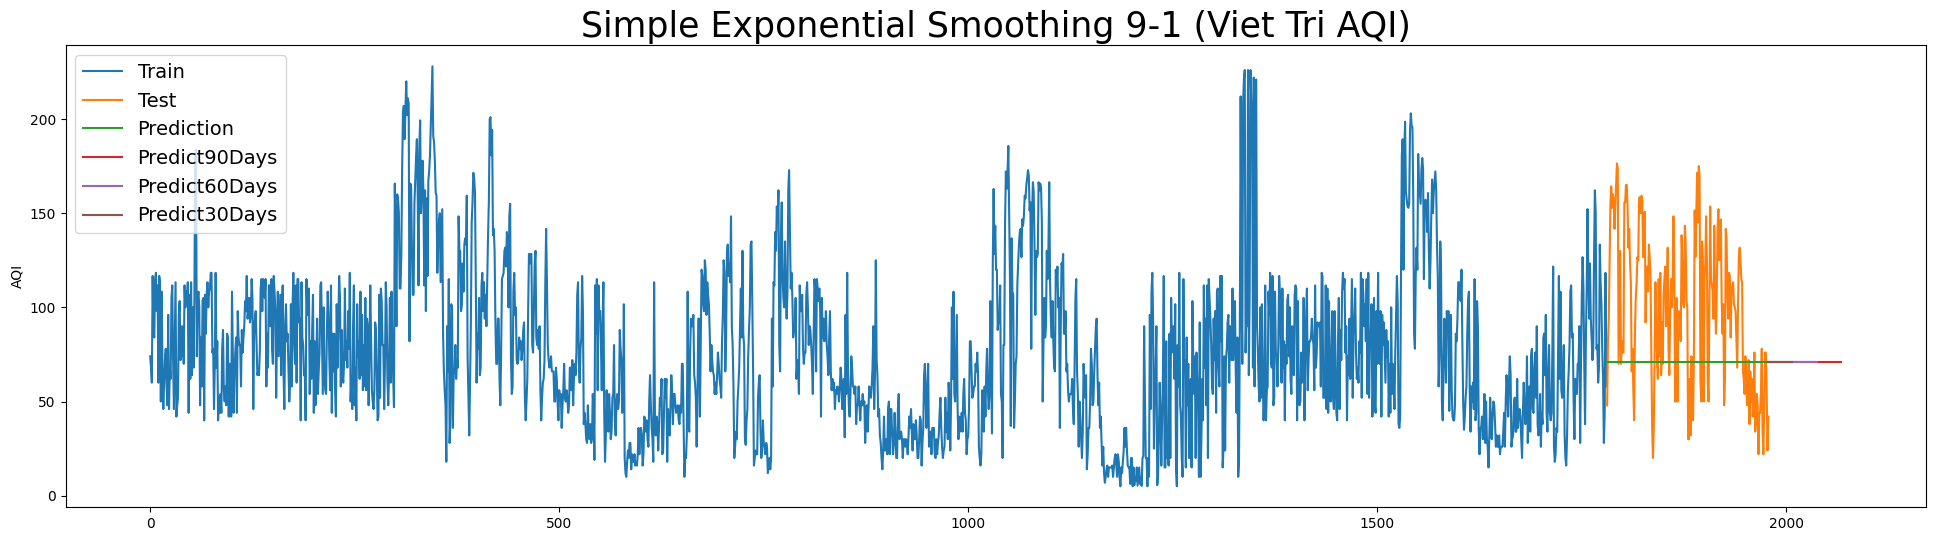

In [14]:
# Biểu diễn kết quả dự đoán trên biểu đồ

# Hà Nội
plt.figure(figsize=(24, 6))
plt.plot(train_data_HN.index, train_data_HN['AQI'])
plt.plot(test_data_HN.index, test_data_HN['AQI'])
plt.plot(test_data_HN.index, test_pred_HN)
plt.plot(last_data_HN_90, pred_90days_HN)
plt.plot(last_data_HN_60, pred_60days_HN)
plt.plot(last_data_HN_30, pred_30days_HN)
plt.title('Simple Exponential Smoothing 9-1 (Ha Noi AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict90Days', 'Predict60Days', 'Predict30Days'], loc='upper left', fontsize=14)

# Đà Nẵng
plt.figure(figsize=(24, 6))
plt.plot(train_data_DN.index, train_data_DN['AQI'])
plt.plot(test_data_DN.index, test_data_DN['AQI'])
plt.plot(test_data_DN.index, test_pred_DN)
plt.plot(last_data_DN_90, pred_90days_DN)
plt.plot(last_data_DN_60, pred_60days_DN)
plt.plot(last_data_DN_30, pred_30days_DN)
plt.title('Simple Exponential Smoothing 9-1 (Da Nang AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict90Days', 'Predict60Days', 'Predict30Days'], loc='upper left', fontsize=14)

# Việt Trì
plt.figure(figsize=(24, 6))
plt.plot(train_data_VT.index, train_data_VT['AQI'])
plt.plot(test_data_VT.index, test_data_VT['AQI'])
plt.plot(test_data_VT.index, test_pred_VT)
plt.plot(last_data_VT_90, pred_90days_VT)
plt.plot(last_data_VT_60, pred_60days_VT)
plt.plot(last_data_VT_30, pred_30days_VT)
plt.title('Simple Exponential Smoothing 9-1 (Viet Tri AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict90Days', 'Predict60Days', 'Predict30Days'], loc='upper left', fontsize=14)

In [15]:
# Chia dữ liệu train, test theo tỉ lệ 7:3

# Hà Nội
train_size_HN = int(0.7 * len(df_HN))
test_size_HN = len(df_HN) - train_size_HN

train_data_HN = df_HN[:train_size_HN]
test_data_HN = df_HN[train_size_HN:train_size_HN+test_size_HN]

# Đà Nẵng
train_size_DN = int(0.7 * len(df_DN))
test_size_DN = len(df_DN) - train_size_DN

train_data_DN = df_DN[:train_size_DN]
test_data_DN = df_DN[train_size_DN:train_size_DN+test_size_DN]

#Việt Trì
train_size_VT = int(0.7 * len(df_VT))
test_size_VT = len(df_VT) - train_size_VT

train_data_VT = df_VT[:train_size_VT]
test_data_VT = df_VT[train_size_VT:train_size_VT+test_size_VT]

In [16]:
# Train model
model_HN = SimpleExpSmoothing(train_data_HN['AQI']).fit(optimized=True)
model_DN = SimpleExpSmoothing(train_data_DN['AQI']).fit(optimized=True)
model_VT = SimpleExpSmoothing(train_data_VT['AQI']).fit(optimized=True)

In [17]:
# Dự đoán trên tập test và dự đoán 30 ngày tiếp theo

# Hà Nội
test_pred_HN = model_HN.forecast(len(test_data_HN['AQI']))
last_index_HN = df_HN.index[-1]
last_data_HN_30 = pd.RangeIndex(start=last_index_HN, stop=last_index_HN+30, step=1)
last_data_HN_60 = pd.RangeIndex(start=last_index_HN, stop=last_index_HN+60, step=1)
last_data_HN_90 = pd.RangeIndex(start=last_index_HN, stop=last_index_HN+90, step=1)
pred_30days_HN = model_HN.forecast(len(last_data_HN_30))
pred_60days_HN = model_HN.forecast(len(last_data_HN_60))
pred_90days_HN = model_HN.forecast(len(last_data_HN_90))

# Đà Nẵng
test_pred_DN = model_DN.forecast(len(test_data_DN['AQI']))
last_index_DN = df_DN.index[-1]
last_data_DN_30 = pd.RangeIndex(start=last_index_DN, stop=last_index_DN+30, step=1)
last_data_DN_60 = pd.RangeIndex(start=last_index_DN, stop=last_index_DN+60, step=1)
last_data_DN_90 = pd.RangeIndex(start=last_index_DN, stop=last_index_DN+90, step=1)
pred_30days_DN = model_DN.forecast(len(last_data_DN_30))
pred_60days_DN = model_DN.forecast(len(last_data_DN_60))
pred_90days_DN = model_DN.forecast(len(last_data_DN_90))

#Việt Trì
test_pred_VT = model_VT.forecast(len(test_data_VT['AQI']))
last_index_VT = df_VT.index[-1]
last_data_VT_30 = pd.RangeIndex(start=last_index_VT, stop=last_index_VT+30, step=1)
last_data_VT_60 = pd.RangeIndex(start=last_index_VT, stop=last_index_VT+60, step=1)
last_data_VT_90 = pd.RangeIndex(start=last_index_VT, stop=last_index_VT+90, step=1)
pred_30days_VT = model_VT.forecast(len(last_data_VT_30))
pred_60days_VT = model_VT.forecast(len(last_data_VT_60))
pred_90days_VT = model_VT.forecast(len(last_data_VT_90))

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Hà Nội
mape_HN = np.mean(np.abs((test_data_HN['AQI'] - test_pred_HN) / test_data_HN['AQI'])) * 100
mae_HN = mean_absolute_error(test_data_HN['AQI'], test_pred_HN)
rmse_HN = np.sqrt(mean_squared_error(test_data_HN['AQI'], test_pred_HN))

print(f'Hà Nội MAPE: {mape_HN:.2f}%')
print(f'Hà Nội MAE: {mae_HN:.2f}')
print(f'Hà Nội RMSE: {rmse_HN:.2f}')

# Đà Nẵng
mape_DN = np.mean(np.abs((test_data_DN['AQI'] - test_pred_DN) / test_data_DN['AQI'])) * 100
mae_DN = mean_absolute_error(test_data_DN['AQI'], test_pred_DN)
rmse_DN = np.sqrt(mean_squared_error(test_data_DN['AQI'], test_pred_DN))

print(f'Đà Nẵng MAPE: {mape_DN:.2f}%')
print(f'Đà Nẵng MAE: {mae_DN:.2f}')
print(f'Đà Nẵng RMSE: {rmse_DN:.2f}')

#Việt Trì
mape_VT = np.mean(np.abs((test_data_VT['AQI'] - test_pred_VT) / test_data_VT['AQI'])) * 100
mae_VT = mean_absolute_error(test_data_VT['AQI'], test_pred_VT)
rmse_VT = np.sqrt(mean_squared_error(test_data_VT['AQI'], test_pred_VT))

print(f'Việt Trì MAPE: {mape_VT:.2f}%')
print(f'Việt Trì MAE: {mae_VT:.2f}')
print(f'Việt Trì RMSE: {rmse_VT:.2f}')

Hà Nội MAPE: 32.00%
Hà Nội MAE: 36.61
Hà Nội RMSE: 44.81
Đà Nẵng MAPE: 77.31%
Đà Nẵng MAE: 39.14
Đà Nẵng RMSE: 51.27
Việt Trì MAPE: 60.82%
Việt Trì MAE: 34.80
Việt Trì RMSE: 41.34


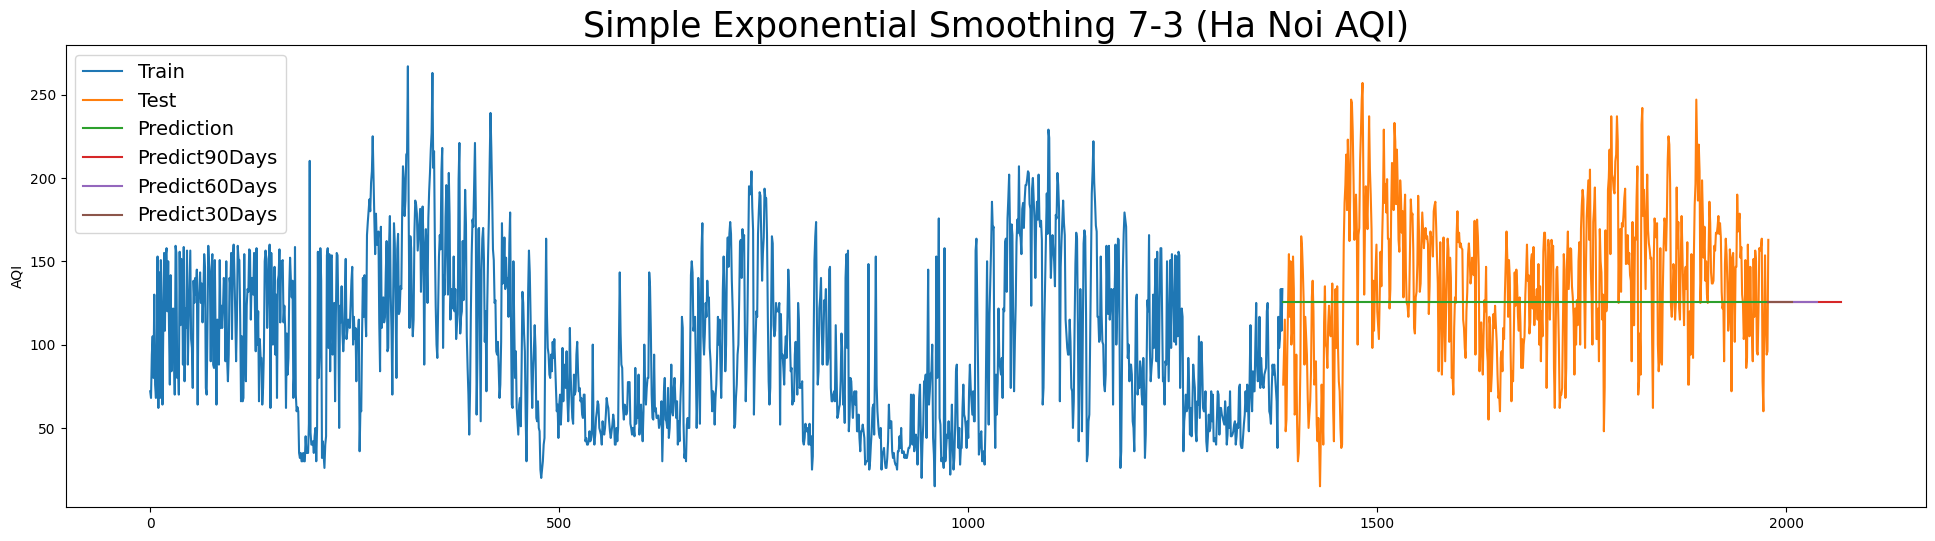

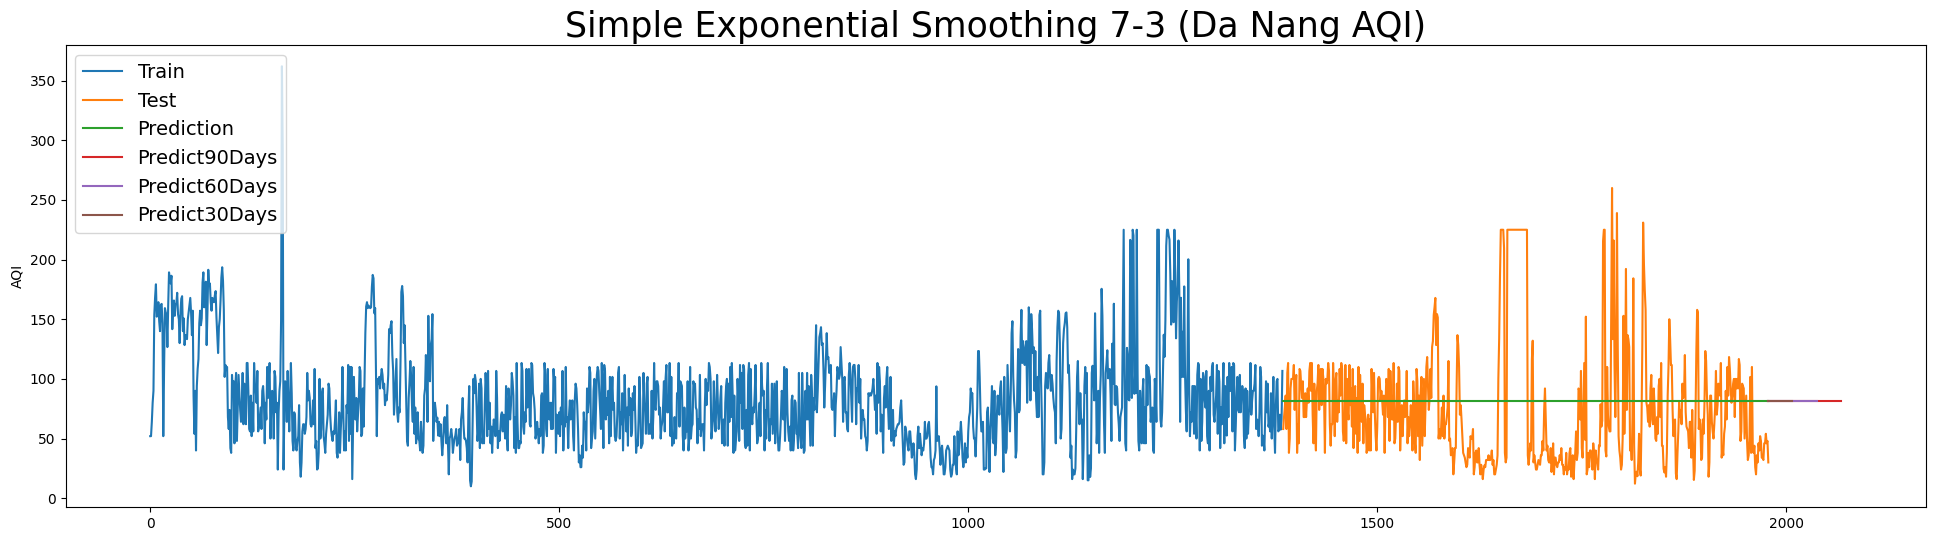

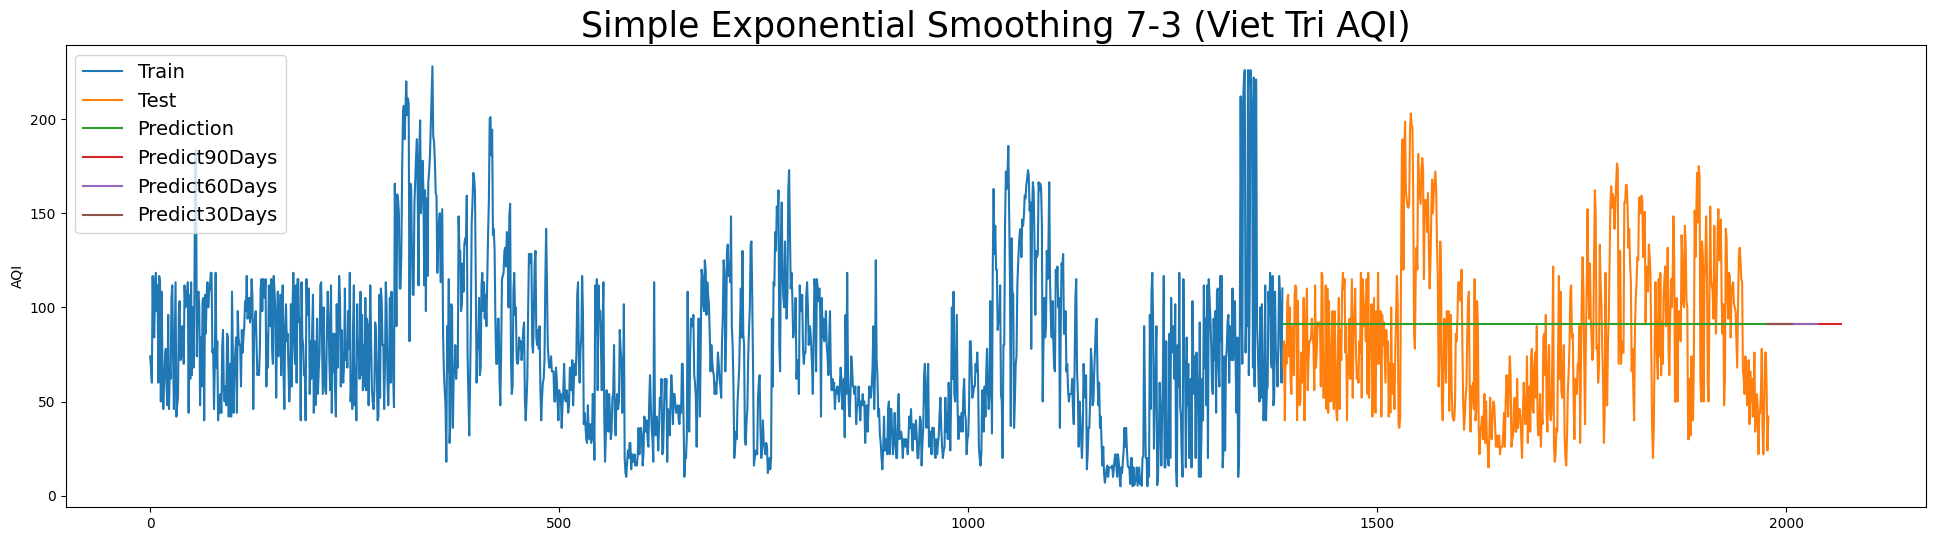

In [19]:
# Biểu diễn kết quả dự đoán trên biểu đồ

# Hà Nội
plt.figure(figsize=(24, 6))
plt.plot(train_data_HN.index, train_data_HN['AQI'])
plt.plot(test_data_HN.index, test_data_HN['AQI'])
plt.plot(test_data_HN.index, test_pred_HN)
plt.plot(last_data_HN_90, pred_90days_HN)
plt.plot(last_data_HN_60, pred_60days_HN)
plt.plot(last_data_HN_30, pred_30days_HN)
plt.title('Simple Exponential Smoothing 7-3 (Ha Noi AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict90Days', 'Predict60Days', 'Predict30Days'], loc='upper left', fontsize=14)

# Đà Nẵng
plt.figure(figsize=(24, 6))
plt.plot(train_data_DN.index, train_data_DN['AQI'])
plt.plot(test_data_DN.index, test_data_DN['AQI'])
plt.plot(test_data_DN.index, test_pred_DN)
plt.plot(last_data_DN_90, pred_90days_DN)
plt.plot(last_data_DN_60, pred_60days_DN)
plt.plot(last_data_DN_30, pred_30days_DN)
plt.title('Simple Exponential Smoothing 7-3 (Da Nang AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict90Days', 'Predict60Days', 'Predict30Days'], loc='upper left', fontsize=14)

# Việt Trì
plt.figure(figsize=(24, 6))
plt.plot(train_data_VT.index, train_data_VT['AQI'])
plt.plot(test_data_VT.index, test_data_VT['AQI'])
plt.plot(test_data_VT.index, test_pred_VT)
plt.plot(last_data_VT_90, pred_90days_VT)
plt.plot(last_data_VT_60, pred_60days_VT)
plt.plot(last_data_VT_30, pred_30days_VT)
plt.title('Simple Exponential Smoothing 7-3 (Viet Tri AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict90Days', 'Predict60Days', 'Predict30Days'], loc='upper left', fontsize=14)

In [20]:
# Chia dữ liệu train, test, theo tỉ lệ 8:2

# Hà Nội
train_size_HN = int(0.8 * len(df_HN))
test_size_HN = len(df_HN) - train_size_HN

train_data_HN = df_HN[:train_size_HN]
test_data_HN = df_HN[train_size_HN:train_size_HN+test_size_HN]

# Đà Nẵng
train_size_DN = int(0.8 * len(df_DN))
test_size_DN = len(df_DN) - train_size_DN

train_data_DN = df_DN[:train_size_DN]
test_data_DN = df_DN[train_size_DN:train_size_DN+test_size_DN]

#Việt Trì
train_size_VT = int(0.8 * len(df_VT))
test_size_VT = len(df_VT) - train_size_VT

train_data_VT = df_VT[:train_size_VT]
test_data_VT = df_VT[train_size_VT:train_size_VT+test_size_VT]

In [21]:
# Train model
model_HN = SimpleExpSmoothing(train_data_HN['AQI']).fit(optimized=True)
model_DN = SimpleExpSmoothing(train_data_DN['AQI']).fit(optimized=True)
model_VT = SimpleExpSmoothing(train_data_VT['AQI']).fit(optimized=True)

In [22]:
# Dự đoán trên tập test và dự đoán 30 ngày tiếp theo

# Hà Nội
test_pred_HN = model_HN.forecast(len(test_data_HN['AQI']))
last_index_HN = df_HN.index[-1]
last_data_HN_30 = pd.RangeIndex(start=last_index_HN, stop=last_index_HN+30, step=1)
last_data_HN_60 = pd.RangeIndex(start=last_index_HN, stop=last_index_HN+60, step=1)
last_data_HN_90 = pd.RangeIndex(start=last_index_HN, stop=last_index_HN+90, step=1)
pred_30days_HN = model_HN.forecast(len(last_data_HN_30))
pred_60days_HN = model_HN.forecast(len(last_data_HN_60))
pred_90days_HN = model_HN.forecast(len(last_data_HN_90))

# Đà Nẵng
test_pred_DN = model_DN.forecast(len(test_data_DN['AQI']))
last_index_DN = df_DN.index[-1]
last_data_DN_30 = pd.RangeIndex(start=last_index_DN, stop=last_index_DN+30, step=1)
last_data_DN_60 = pd.RangeIndex(start=last_index_DN, stop=last_index_DN+60, step=1)
last_data_DN_90 = pd.RangeIndex(start=last_index_DN, stop=last_index_DN+90, step=1)
pred_30days_DN = model_DN.forecast(len(last_data_DN_30))
pred_60days_DN = model_DN.forecast(len(last_data_DN_60))
pred_90days_DN = model_DN.forecast(len(last_data_DN_90))

#Việt Trì
test_pred_VT = model_VT.forecast(len(test_data_VT['AQI']))
last_index_VT = df_VT.index[-1]
last_data_VT_30 = pd.RangeIndex(start=last_index_VT, stop=last_index_VT+30, step=1)
last_data_VT_60 = pd.RangeIndex(start=last_index_VT, stop=last_index_VT+60, step=1)
last_data_VT_90 = pd.RangeIndex(start=last_index_VT, stop=last_index_VT+90, step=1)
pred_30days_VT = model_VT.forecast(len(last_data_VT_30))
pred_60days_VT = model_VT.forecast(len(last_data_VT_60))
pred_90days_VT = model_VT.forecast(len(last_data_VT_90))

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Hà Nội
mape_HN = np.mean(np.abs((test_data_HN['AQI'] - test_pred_HN) / test_data_HN['AQI'])) * 100
mae_HN = mean_absolute_error(test_data_HN['AQI'], test_pred_HN)
rmse_HN = np.sqrt(mean_squared_error(test_data_HN['AQI'], test_pred_HN))

print(f'Hà Nội MAPE: {mape_HN:.2f}%')
print(f'Hà Nội MAE: {mae_HN:.2f}')
print(f'Hà Nội RMSE: {rmse_HN:.2f}')

# Đà Nẵng
mape_DN = np.mean(np.abs((test_data_DN['AQI'] - test_pred_DN) / test_data_DN['AQI'])) * 100
mae_DN = mean_absolute_error(test_data_DN['AQI'], test_pred_DN)
rmse_DN = np.sqrt(mean_squared_error(test_data_DN['AQI'], test_pred_DN))

print(f'Đà Nẵng MAPE: {mape_DN:.2f}%')
print(f'Đà Nẵng MAE: {mae_DN:.2f}')
print(f'Đà Nẵng RMSE: {rmse_DN:.2f}')

#Việt Trì
mape_VT = np.mean(np.abs((test_data_VT['AQI'] - test_pred_VT) / test_data_VT['AQI'])) * 100
mae_VT = mean_absolute_error(test_data_VT['AQI'], test_pred_VT)
rmse_VT = np.sqrt(mean_squared_error(test_data_VT['AQI'], test_pred_VT))

print(f'Việt Trì MAPE: {mape_VT:.2f}%')
print(f'Việt Trì MAE: {mae_VT:.2f}')
print(f'Việt Trì RMSE: {rmse_VT:.2f}')

Hà Nội MAPE: 26.31%
Hà Nội MAE: 31.23
Hà Nội RMSE: 37.94
Đà Nẵng MAPE: 72.00%
Đà Nẵng MAE: 42.36
Đà Nẵng RMSE: 60.40
Việt Trì MAPE: 59.50%
Việt Trì MAE: 33.96
Việt Trì RMSE: 40.12


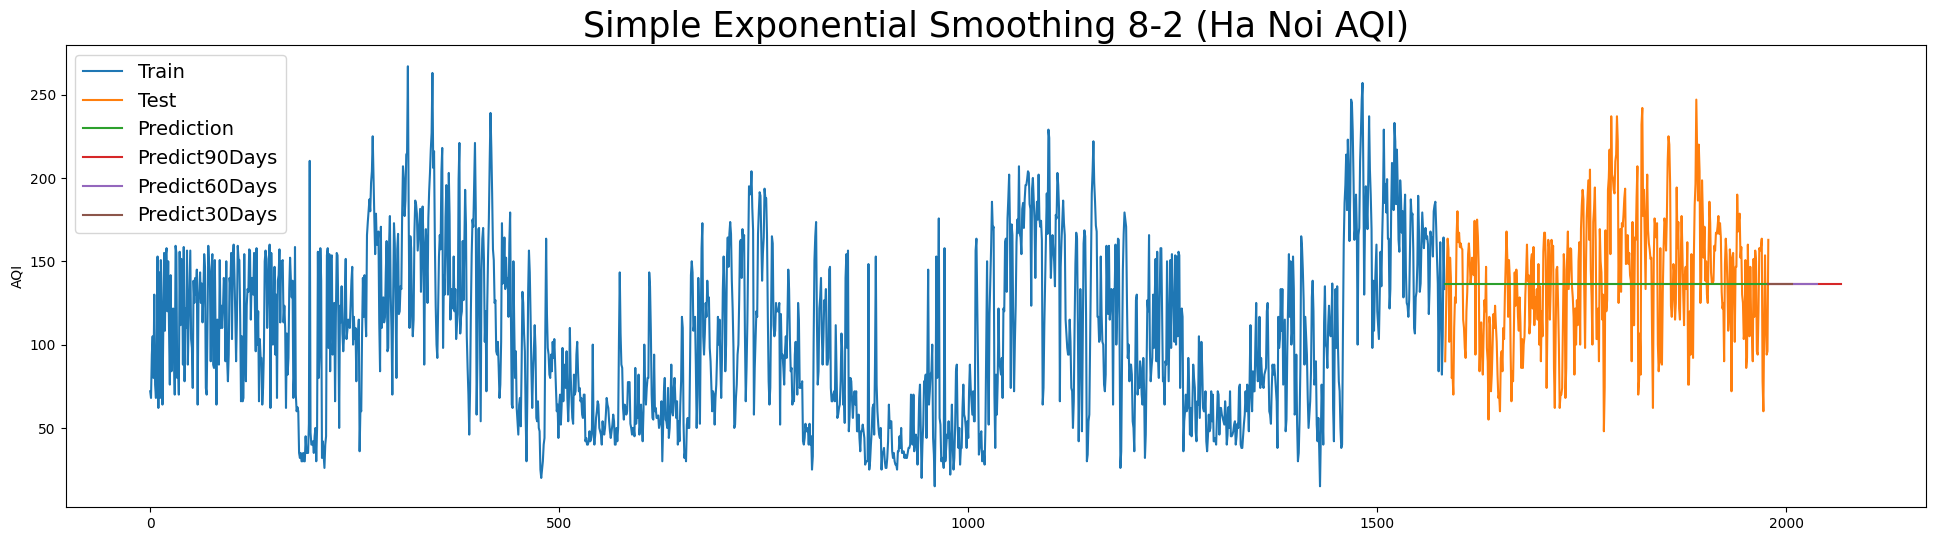

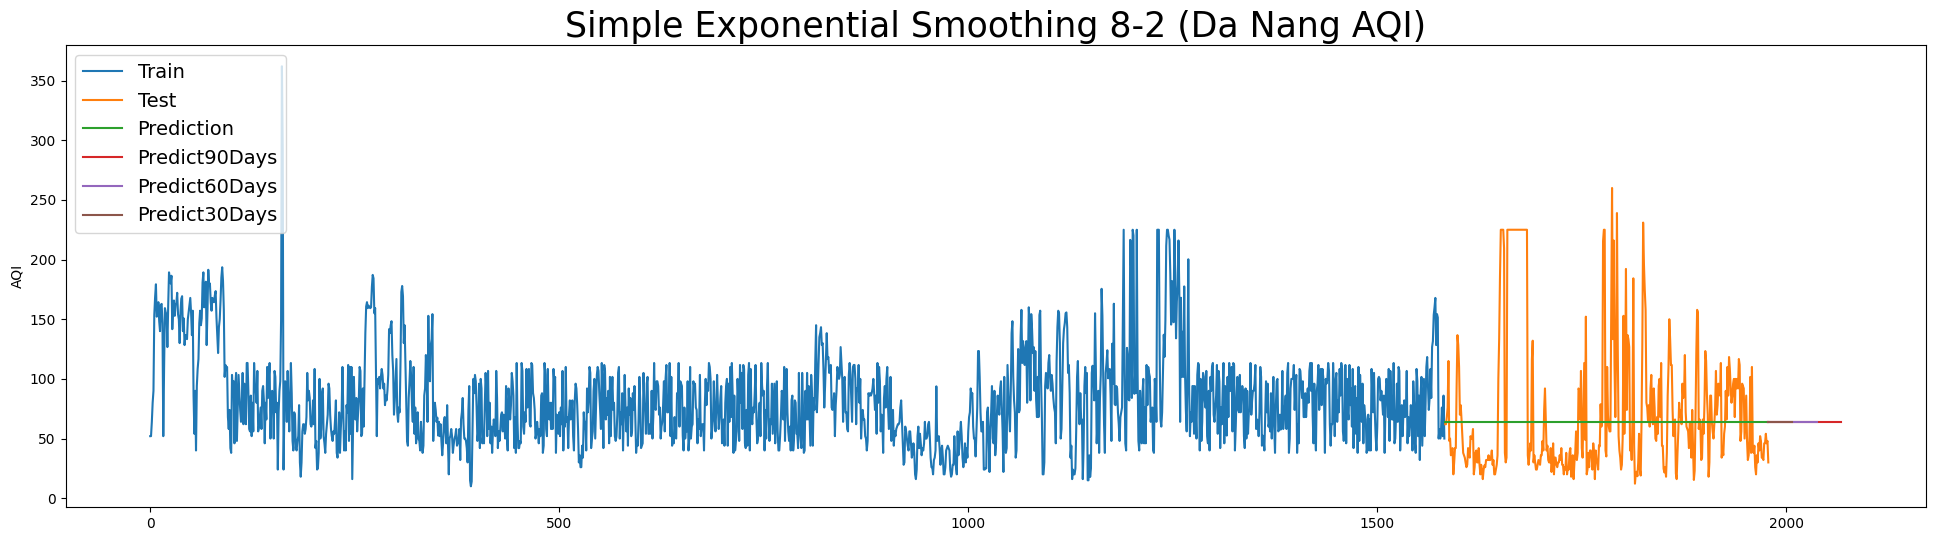

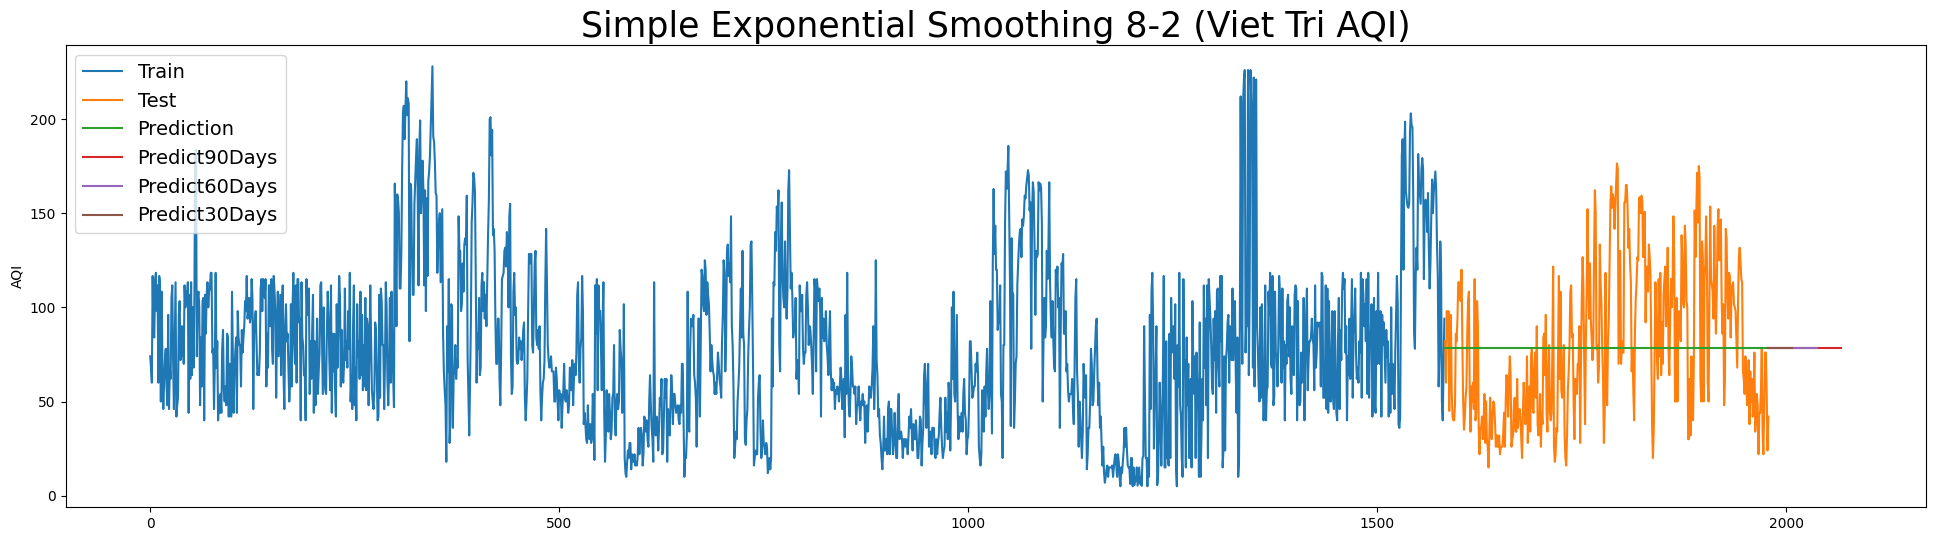

In [24]:
# Biểu diễn kết quả dự đoán trên biểu đồ

# Hà Nội
plt.figure(figsize=(24, 6))
plt.plot(train_data_HN.index, train_data_HN['AQI'])
plt.plot(test_data_HN.index, test_data_HN['AQI'])
plt.plot(test_data_HN.index, test_pred_HN)
plt.plot(last_data_HN_90, pred_90days_HN)
plt.plot(last_data_HN_60, pred_60days_HN)
plt.plot(last_data_HN_30, pred_30days_HN)
plt.title('Simple Exponential Smoothing 8-2 (Ha Noi AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict90Days', 'Predict60Days', 'Predict30Days'], loc='upper left', fontsize=14)

# Đà Nẵng
plt.figure(figsize=(24, 6))
plt.plot(train_data_DN.index, train_data_DN['AQI'])
plt.plot(test_data_DN.index, test_data_DN['AQI'])
plt.plot(test_data_DN.index, test_pred_DN)
plt.plot(last_data_DN_90, pred_90days_DN)
plt.plot(last_data_DN_60, pred_60days_DN)
plt.plot(last_data_DN_30, pred_30days_DN)
plt.title('Simple Exponential Smoothing 8-2 (Da Nang AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict90Days', 'Predict60Days', 'Predict30Days'], loc='upper left', fontsize=14)

# Việt Trì
plt.figure(figsize=(24, 6))
plt.plot(train_data_VT.index, train_data_VT['AQI'])
plt.plot(test_data_VT.index, test_data_VT['AQI'])
plt.plot(test_data_VT.index, test_pred_VT)
plt.plot(last_data_VT_90, pred_90days_VT)
plt.plot(last_data_VT_60, pred_60days_VT)
plt.plot(last_data_VT_30, pred_30days_VT)
plt.title('Simple Exponential Smoothing 8-2 (Viet Tri AQI)', fontsize=25)
plt.ylabel('AQI')
plt.legend(['Train', 'Test', 'Prediction', 'Predict90Days', 'Predict60Days', 'Predict30Days'], loc='upper left', fontsize=14)